# Time Series Modeling of U.S. Retail Sales Data

## DSC 630

## Week 8

## Predictive Analytics Assignment Week 8

## David Berberena

## 7/28/2024

# Program Start

# 1. Plot the data with proper labeling and make some observations on the graph.

In [1]:
# To begin, I will import the necessary libraries to work with the dataset that has been provided. I am in need of Pandas 
# (file reading and data manipulation) and Matplotlib (visualization creation) in this initial step. 

import pandas as pd
import matplotlib.pyplot as plt

# I will read the CSV file containing the U.S. retail sales data provided for the assignment here using pd.read_csv().

us_sales = pd.read_csv('us_retail_sales.csv')

# The head() function will be used here to verify the correct loading of the dataset into the current Python environment.

us_sales.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [2]:
# Upon viewing the dataset prior to loading it into Jupyter, I saw that there were a few missing values at the end of the 
# dataset, specifically the last six observations of the year 2021 (the final row of the dataset). I will fill in these 
# missing values with the sales figures from the previous year plus 70,000 using tail(), fillna(), and mean(). This is my 
# way of mimicking future sales in 2021 and filling in the missing values with relatively viable sales figures.

sales_2021 = us_sales.tail(2)

us_sales = us_sales.fillna(sales_2021.mean() + 70000)

# The tail() function is used to verify the transformation was performed correctly.

us_sales.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,551627.0,553716.0,563327.0,563991.0,558652.0,554782.0


In [3]:
# Immediately I can see that the dtypes of the dataset are slightly different than they should be. The months of July 
# through December look to be float values, while January through June look to be integers. As all of the values in the CSV
# file are whole numbers, I will convert the entire dataset's values into the integer data type. I will do this using the 
# astype() function.

us_sales = us_sales.astype({'JUL': 'int', 'AUG': 'int', 'SEP': 'int', 'OCT': 'int', 'NOV': 'int', 'DEC': 'int'})

# The dtypes attribute of the dataset will be used to verify the conversion of the incorrect float columns to the int type.

us_sales.dtypes

YEAR    int64
JAN     int64
FEB     int64
MAR     int64
APR     int64
MAY     int64
JUN     int64
JUL     int32
AUG     int32
SEP     int32
OCT     int32
NOV     int32
DEC     int32
dtype: object

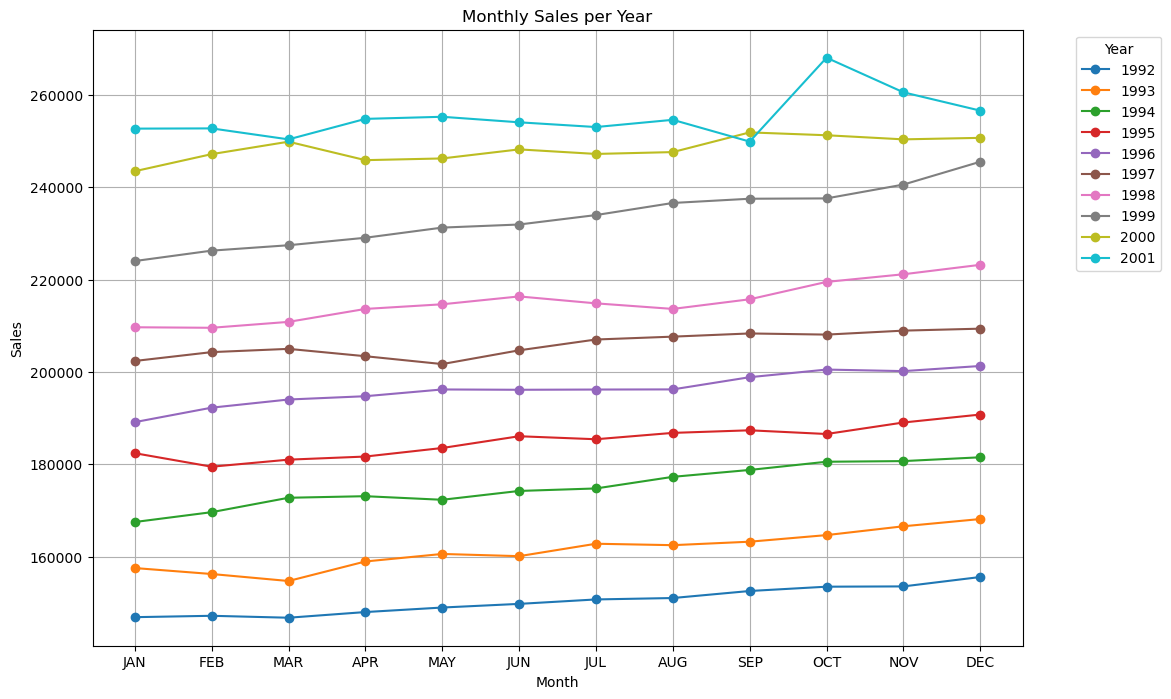

In [4]:
# Since the dataset encompasses thirty years of sales data, I will plot the data using a series of line charts. To make them
# more digestible, I will plot ten years' worth of sales data on one plane, as opposed to all thirty on one plane or having 
# thirty individual plots. To do this, I need to split up the dataset into three, each one holding a decade's worth of data.
# I have done this using head(), indexing, and tail(). 

sales_1992_2001 = us_sales.head(10)

sales_2002_2011 = us_sales.loc[10:19]

sales_2012_2021 = us_sales.tail(10)

# To make certain that the plots will follow the correct month order, I am defining the correct order here to place into the
# plotting function argument.

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# I will plot each year onto one line chart plane by way of a for loop that employs the iterrows() function along with 
# indexing to plot the row values. A legend has been added to distinguish each year's monthly sales figures and placed 
# beside the chart for better readability. 

plt.figure(figsize = (12, 8))

for _, row in sales_1992_2001.iterrows():
    plt.plot(months, row[1:], marker = 'o', label = row['YEAR'])

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales per Year')
plt.legend(title = 'Year', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)

plt.show()

In the line chart above, this first decade of sales figures shows that each year eclipses the last in sales, with the lines steadily increasing over each month of the year. There are a few instances in the chart where the next month's is lower than the previous month, yet this does not dispute the increasing trend in every year's line chart. The only line chart that begs for further analysis is the sales for the year 2001, as there is a point where September sales dip below sales for September of the prior year. This could be attributed to an external event (potentially the terrorist attack on the Twin Towers on 9/11), yet more research would need to be performed to understand this abnormality. 

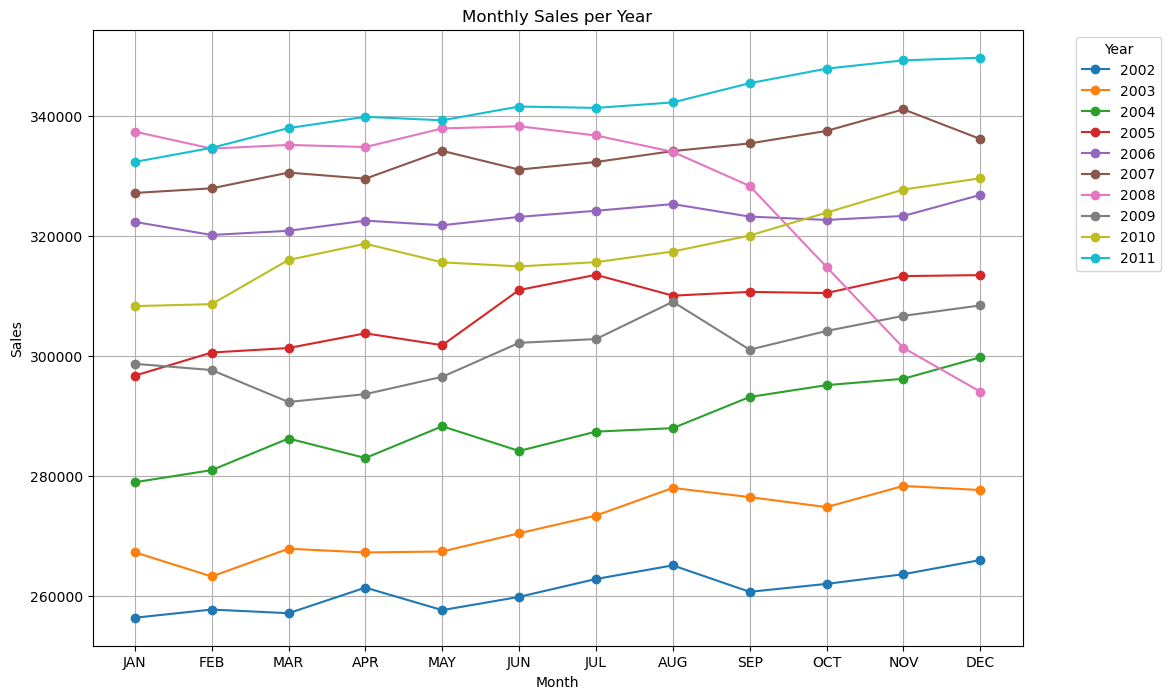

In [5]:
# Here is the code to output the next decade's sales. 

plt.figure(figsize = (12, 8))

for _, row in sales_2002_2011.iterrows():
    plt.plot(months, row[1:], marker = 'o', label = row['YEAR'])

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales per Year')
plt.legend(title = 'Year', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)

plt.show()

The consolidated line chart highlighting the monthly sales figures for the decade starting from 2002 indicates another external event that has impeded sales for a particular year. The overall steadily increasing trend holds true for this decade as well, yet the sales in 2008 threw off the sales for the rest of the decade. The next two years after 2008 saw sales figures lower than previous years. The upward trend continues from 2009 onward, yet the anomality in 2008 (most likely the economic recession) set sales figures back quite a bit. 

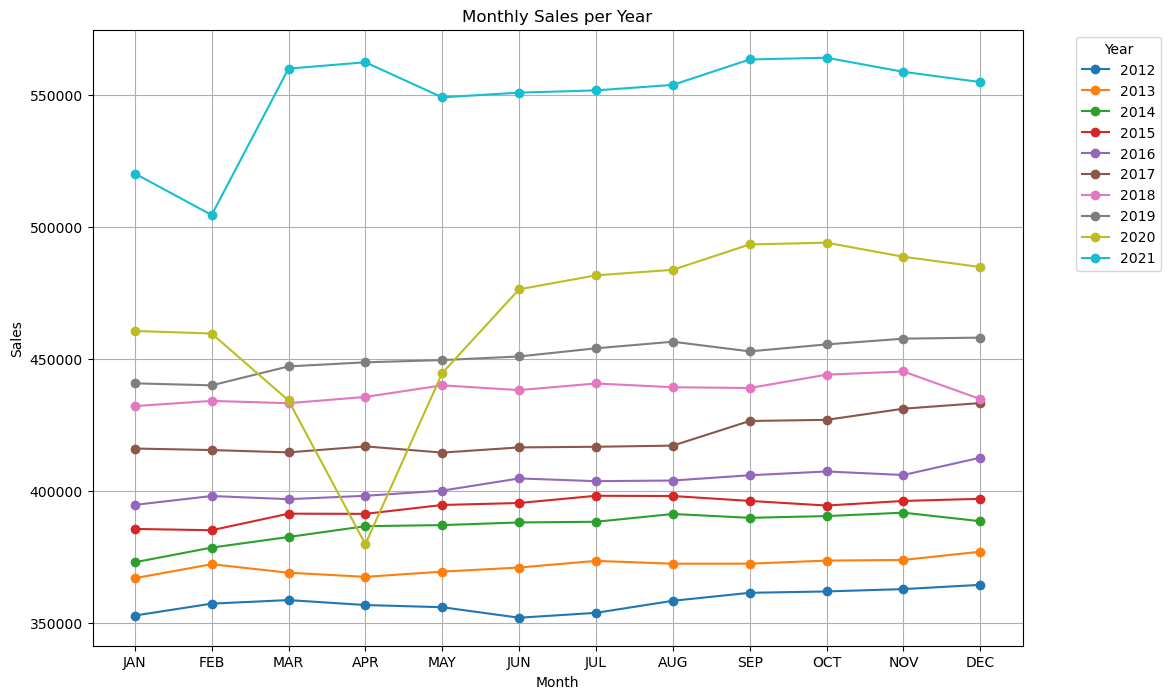

In [6]:
# Here is the code to output the final decade's sales (2021's latter half of the year sales are zero due to my filling in 
# the missing sales values with 0). I chose not to plug in any measure of central tendency since they might skew any 
# observations made on the charts.

plt.figure(figsize = (12, 8))

for _, row in sales_2012_2021.iterrows():
    plt.plot(months, row[1:], marker = 'o', label = row['YEAR'])

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales per Year')
plt.legend(title = 'Year', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)

plt.show()

For the final decade of monthly sales, we can see one other anomaly in the data causing sales for 2020 to drastically decrease. The abnormality in sales looks to be around the same time as the mass emergence of COVID-19 in the United States, yet more data would need to be gathered to confirm this assumption. All other follow the same trend of slowly increasing sales over time while beginning the year with more sales than the same month of the previous year. We can also see the last six observations of the 2021 line chart visualized to mimic the previous year's sales adjusted to look seamless in the pattern of the first half of 2021 sales. 

## 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [7]:
# To split the dataset with a specific range of observations in mind for the test set, I will need to do split without the 
# use of the typical train_test_split() function. I have chosen to separate out the years 2020 and 2021 and manually create 
# a range that will extract the necessary data points using indexing and the values attribute. I have made the training set 
# by indexing the observations to include everything before the start of the 2021 sales data. Then I need to exclude the last
# six data points from the training set as they belong to the test set (July 2020 to December 2020). Again indexing assisted
# with this by setting those values to NaN values.

import numpy as np

test_start_range = us_sales[us_sales['YEAR'] == 2020].index[0]
test_end_range = us_sales[us_sales['YEAR'] == 2021].index[0]

sales_train = us_sales.iloc[:test_end_range].copy()
sales_train.iloc[-1, 7:] = None

# I have printed the training set set to make sure it has been crafted properly.

sales_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0
5,1997,202371,204286,204990,203399,201699,204675,207014.0,207635.0,208326.0,208078.0,208936.0,209363.0
6,1998,209666,209552,210832,213633,214639,216337,214841.0,213636.0,215720.0,219483.0,221134.0,223179.0
7,1999,223997,226250,227417,229037,231235,231903,233948.0,236566.0,237481.0,237553.0,240544.0,245485.0
8,2000,243436,247133,249825,245831,246201,248160,247176.0,247576.0,251837.0,251221.0,250331.0,250658.0
9,2001,252654,252704,250328,254763,255218,254022,252997.0,254560.0,249845.0,267999.0,260514.0,256549.0


In [8]:
# For the test set, I needed to concatenate the observations obtained by the index variable I made to capture the last 
# twelve observations. I have imported NumPy to use its concatenate() function instead of Pandas's pd.concat() function 
# since I only extracted the values, not the DataFrame structure the values existed in. With the observations captured, I 
# crafted the test set DataFrame by specifying the order of the months and using the reshape() function along with 
# pd.DataFrame to attach the correct sales figures to the correct months. Finally, I added a Year column that specifies that
# the observations are from 2021 simply because one column handling two different years is not as feasible as simply having
# the data start from the beginning of a new year. This means that January 2021 in the test set is really July 2020's sales
# value, while December 2021 in the test set is actually June 2021's sales figure.


sales_test_jul_to_dec_2020 = us_sales.iloc[test_start_range, 7:].values
sales_test_jan_to_jun_2021 = us_sales.iloc[test_end_range, 1:7].values

sales_test = np.concatenate([sales_test_jul_to_dec_2020, sales_test_jan_to_jun_2021])

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
sales_test = pd.DataFrame(sales_test.reshape(1, -1), columns = months)

sales_test.insert(0, 'YEAR', '2021')

# I have printed the test set set to make sure it has been crafted properly.

sales_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2021,481627,483716,493327,493991,488652,484782,520162,504458,559871,562269,548987,550782


## 3. Use the training set to build a predictive model for the monthly retail sales.

In [9]:
# While there are other models that can handle time series, I can manipulate the training and test sets to work with a 
# linear regression model, which also can predict monthly retail sales. I will employ the ordinary least squares model as it
# provides an in-depth summary of key performance indicators like R-Squared and the Prob (F-Statistic) value, both of which 
# provide insight into the model's significance and predictive power. I will need to import the sm module from the 
# Statsmodel library, which is done below.

import statsmodels.api as sm

# To have the training and test sets work for an OLS model to predict monthly retail sales, I need to convert the data into
# time series data recognized by Python and create lagged features so the model recognizes that the sales figures are past
# observations meant to have an effect on future sales. To start, I have switched the training set from wide to long format
# using the pd.melt() function and specified the columns that are to remain unpivoted while attaching names to the variables
# for clearer identification. To transform the melted training set to time series data, I added a 'Date' column that 
# combines the year and month strings of each row and formats them into time series data using pd.to_datetime(). After 
# sorting the data by the new 'Date' column and seting the index as the same column, I created a for loop to craft the 
# lagged features using the shift() function, which pushes the data over by the number of lags needed.

sales_train_melted = pd.melt(sales_train, id_vars = ['YEAR'], 
                             value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 
                                         'DEC'], var_name = 'MONTH', value_name = 'SALES')

sales_train_melted['DATE'] = pd.to_datetime(sales_train_melted['YEAR'].astype(str) + '-' + sales_train_melted['MONTH'], 
                                            format = '%Y-%b')
sales_train_melted = sales_train_melted.sort_values('DATE').set_index('DATE')

for i in range(1, 13):
    sales_train_melted[f'SALES_LAG_{i}'] = sales_train_melted['SALES'].shift(i)
    
# After lagging the data, there are many NaN values since nothing replaced the data that was shifted, so I will drop the 
# missing values using dropna().

sales_train_melted = sales_train_melted.dropna()

# Here I am simply creating the two training set parameters needed for the OLS model by indexing and dropping the necessary
# columns to keep only the lagged sales figures and the regular sales values. As OLS models need a constant in the data, I 
# have added the constant to the X_train set to fit the OLS model with the data. 

sales_xtrain = sales_train_melted.drop(columns = ['YEAR', 'MONTH', 'SALES'])
sales_ytrain = sales_train_melted['SALES']

sales_xtrain = sm.add_constant(sales_xtrain)
ols_model = sm.OLS(sales_ytrain, sales_xtrain).fit()

# The summary() function is used here to show the model's generation and to visualize the significance of the model.

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6248.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:07:56   Log-Likelihood:                -3306.7
No. Observations:                 330   AIC:                             6639.
Df Residuals:                     317   BIC:                             6689.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2082.2101   1169.286      1.781      0.076    -218.331    4382.751
SALES_LAG_1      0.8527      0.057     14.972      0.000       0.741       0.965
SALES_LAG_2     -0.3512      0.082     -4.266      0.000      -0.513      -0.189
SALES_LAG_3      0.3393      0.134      2.523      0.012       0.075       0.604
SALES_LAG_4      0.2463      0.138      1.785      0.075      -0.025       0.518
SALES_LAG_5     -0.1164      0.142     -0.820      0.413      -0.396       0.163
SALES_LAG_6      0.1435      0.142      1.012      0.312      -0.135       0.423
SALES_LAG_7     -0.0363      0.142     -0.256      0.798      -0.316       0.243
SALES_LAG_8     -0.2043      0.142     -1.440      0.151      -0.484       0.075
SALES_LAG_9      0.1627      0.143      1.141      0.255      -0.118       0.443
SALES_LAG_10     0.0360      0.143      0.251      0.802      -0.246       0.318
SALES_LAG_11     0.0211      0.143      0.148      0.883      -0.260       0.302
SALES_LAG_12    -0.0963      0.104     -0.924      0.356      -0.301       0.109
==============================================================================
Omnibus:                      298.508   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38242.018
Skew:                          -3.039   Prob(JB):                         0.00
Kurtosis:                      55.386   Cond. No.                     4.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model's predictive power can be identified by looking at the coefficient of determination (R-Squared), F-Statistic, and Prob (F-Statistic) values. The R-Squared value is 0.996, which shows the model is a good fit for the data and speaks positively to its predictive accuracy. The F-Statistic value is very high, highlighting the model's skillful ability to predict outcome of future retail sales. The Prob (F-Statistic) value for the model is 0.00, indicating that the model has great predictive power and high statistical significance. 

## 4. Use the model to predict the monthly retail sales on the last year of data.

In [10]:
# The same process of transforming the training set above to work with the model parameters of needing time series data will
# be performed here on the test set to create predictions for the monthly retail sales on the last year of data. 

sales_test_melted = pd.melt(sales_test, id_vars = ['YEAR'], 
                             value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 
                                           'DEC'], var_name='MONTH', value_name='SALES')

sales_test_melted['DATE'] = pd.to_datetime(sales_test_melted['YEAR'].astype(str) + '-' + sales_test_melted['MONTH'], 
                                            format = '%Y-%b')
sales_test_melted = sales_test_melted.sort_values('DATE').set_index('DATE')

for i in range(1, 13):
    sales_test_melted[f'SALES_LAG_{i}'] = sales_test_melted['SALES'].astype(float)

sales_xtest = sales_test_melted.drop(columns = ['YEAR', 'MONTH', 'SALES'])
sales_ytest = sales_test_melted['SALES'].astype(float)

sales_xtest = sm.add_constant(sales_xtest)

# The predict() function will output the model's sales predictions.

sales_ypred = ols_model.predict(sales_xtest)

# I will print the predictions to verify the model's success in generating them. Again, the 'Date' column has been made to 
# allow the model to work with the entire year of 2021, when in reality these sales figures are for July 2020 to June 2021. 
# So '2021-01-01' is really the sales number for July 2020, while '2021-12-01' is the sales figure for June 2021.

sales_ypred

DATE
2021-01-01    482387.428168
2021-02-01    484470.695096
2021-03-01    494055.318571
2021-04-01    494717.496282
2021-05-01    489393.148688
2021-06-01    485533.769554
2021-07-01    520816.672327
2021-08-01    505155.770542
2021-09-01    560416.694548
2021-10-01    562808.113453
2021-11-01    549562.564707
2021-12-01    551352.638491
dtype: float64

## 5. Report the RMSE of the model predictions on the test set.

In [12]:
# Now that the predictions have been generated, I will import the mean_squared_error() function from Sci-kitlearn to find 
# the RMSE value of the predictions. I will use the np.sqrt() function as well since RMSE is the square root of MSE.

from sklearn.metrics import mean_squared_error

ols_sales_pred_rmse = np.sqrt(mean_squared_error(sales_ytest, sales_ypred))

print('The RMSE of the OLS model predcitions on the test set is:', ols_sales_pred_rmse)

The RMSE of the OLS model predcitions on the test set is: 675.8530273521616


The RMSE shown here is low considering that the sales figures we have been dealing with are listed in the hundreds of thousands. This means that the margin of error the predictive model exhibits is very low, also indicating the model's high predictive accuracy. 